In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import scipy as sp

import matplotlib.pyplot as plt
import numpy as np

# Question 1
#### Problem statement:
#### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


### Our Business Problem is:
#### Is there significant difference in the diameter of the cutlet ?

In [2]:
# Load the dataset
cutlet=pd.read_csv(r"C:\Users\Vanshika\Desktop\Change Assignmnets\Cutlets.csv")


In [3]:
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
print('Unit A', 'Unit A')

Unit A Unit A


In [5]:
cutlet

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


#### Now we will check normality of both sets 
#### $\alpha$  == 0.05 (95% Confidence level for data )
#### Is Uniy A and Unit B are  normal ? or we need to normalize the data ?
#### H <sub> 0</sub>  = Unit  A and Uint B are normal
#### H <sub> 1</sub>  = Uint A and Unit B are not normal

In [6]:
stats.shapiro(cutlet["Unit A"])

ShapiroResult(statistic=0.9649458527565002, pvalue=0.3199819028377533)

In [7]:
stats.shapiro(cutlet["Unit B"])

ShapiroResult(statistic=0.9727300405502319, pvalue=0.5224985480308533)

#### P value for Unit A == 0.32 > $\alpha$
#### P value for Unit B == 0.52 > $\alpha$

In [8]:
sp.stats.normaltest(cutlet['Unit A']) #another method to check normality

NormaltestResult(statistic=2.761164477860819, pvalue=0.25143211686667205)

In [9]:
sp.stats.normaltest(cutlet['Unit B']) #another method to check normality

NormaltestResult(statistic=1.228479990932946, pvalue=0.541051941019278)

In [10]:
cutlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


### H <sub> 0</sub>  is accepted. Thats is both unit A and Unit B are normal

###  No need to normalize the data

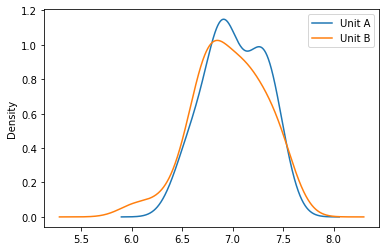

In [11]:
cutlet.plot(kind='kde')
plt.show()

#### Plot also show that both units are almost normal

In [12]:
unitA=pd.Series(cutlet.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [13]:
unitB=pd.Series(cutlet.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

### Assumption and Hypothesis testing

#### H <sub> 0</sub>  = Mean size of cutlets in both units are same (There is no significance difference between diameter of the Culets)
#### H <sub> 1</sub> = mean size of cutlets in both units are not same (There is a significance difference between diameter of the Culets)

In [14]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [15]:
p_value[1]     # 2-tail probability 

0.4722394724599501

#### compare p_value with α = 0.05 (At 5% significance level)




#### P value of above test = 0.45 > $ \alpha $
#### H<sub>0</sub> is accepted
## this implies there is not  significance difference in size of cutlets

In [16]:
cutlet.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

# Question 2

### Problem Statement :
#### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch
### our business problem is:
#### Is there a significant difference in the average Turn Around Time between laboratories ?

In [17]:
# load the dataset
labtat=pd.read_csv(r"C:\Users\Vanshika\Desktop\Change Assignmnets\LabTAT.csv")
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


####  $\alpha$ == 0.05 (95% Confidence)
#### are Laboratory 1, Laboratory 2, Laboratory 3, Laboratory 4 data normal ?

### H <sub> 0</sub>  = data is normal 
### H <sub> 1</sub>  = data is not normal

In [18]:
stats.shapiro(labtat["Laboratory 1"])


ShapiroResult(statistic=0.9901824593544006, pvalue=0.5506953597068787)

In [19]:
stats.shapiro(labtat["Laboratory 2"])


ShapiroResult(statistic=0.9936322569847107, pvalue=0.8637524843215942)

In [20]:
stats.shapiro(labtat["Laboratory 3"])


ShapiroResult(statistic=0.9886345267295837, pvalue=0.4205053448677063)

In [21]:
stats.shapiro(labtat["Laboratory 4"])

ShapiroResult(statistic=0.9913753271102905, pvalue=0.6618951559066772)

#### As all p-values are > $\alpha $
#### This implies data is normal
#### (Null hypothesis is accepted)
### No need to normlize the data

#### Perform Levene test for equal variances.

#### The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#### Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [22]:
stats.levene(labtat["Laboratory 1"], labtat["Laboratory 2"], labtat["Laboratory 3"], labtat["Laboratory 4"])

LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)

In [23]:
stats.bartlett(labtat["Laboratory 1"], labtat["Laboratory 2"], labtat["Laboratory 3"], labtat["Laboratory 4"])

BartlettResult(statistic=6.099521405922483, pvalue=0.10686741658107135)

#### Perform Bartlett’s test for equal variances.
#### Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations

In [24]:
stats.fligner(labtat["Laboratory 1"], labtat["Laboratory 2"], labtat["Laboratory 3"], labtat["Laboratory 4"])
# this is fligner test for checking variance

FlignerResult(statistic=7.720283484639089, pvalue=0.052160548479244895)

#### By above tests we know that varience is same for all four Laboratory

#### Now we will use anova test to check whether there is any difference in average TAT among the different laboratories at 5% significance level.


#### H <sub> 0</sub>  =Variance is same for all  laboratories 
#### H <sub> 1</sub>  = Variance is not same for all laboratories 

In [25]:
# Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)
p_value=stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [26]:
# another way to write code :)
stats.stats.f_oneway(labtat["Laboratory 1"], labtat["Laboratory 2"], labtat["Laboratory 3"], labtat["Laboratory 4"])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [27]:
p_value[1]  # compare it with α = 0.05

2.1156708949992414e-57

#### As p value of one way Anove > $ \alpha $ 
#### This implies the null hypothesis is accepted 
#### This meansTAT for 4 laboratories not equal (There is a significance difference between TAT of the laboratories)

# Question 3

In [28]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

### Problem Statement :
#### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions

#### Business Problem
#### Is the male-female buyer rations are similar across regions
####  $ \alpha $  = 0.05 (95% Confidence)
#### Since there are more than 2 variable we will perform Chi-Square test

In [29]:
# load the dataset
buyerratio=pd.read_csv(r"C:\Users\Vanshika\Desktop\Change Assignmnets\BuyerRatio.csv")


In [30]:
buyerratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [31]:
# Make dimensional array
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

### H <sub> 0</sub>  =The male-female buyer rations are similar across regions
### H <sub> 1</sub>  = The male-female buyer rations are not similar across regions

In [32]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [33]:
# Compare p_value with α = 0.05

### P value of Chi-Square test == 0.66 > $\alpha$

### Thus H <sub> 0</sub>  is accepted.
### The male-female buyer rations are similar across regions


# Question 4

### Problem Statement :
#### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

### Bussiness Problem
#### Does the defective % varies significantly by centre ?
#### $ \alpha$ = 0.05 (95% Confidence)
#### Since there are more than 2 variable we will perform Chi-Square test

In [34]:
import pandas as pd
import numpy as np
from scipy import stats

In [37]:
# load the dataset
data=pd.read_csv(r"C:\Users\Vanshika\Desktop\Change Assignmnets\Costomer+OrderForm.csv")


In [38]:
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [39]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [40]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [41]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [42]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [43]:
# Make a contingency table
obs=np.array([[271,267,269,280],[29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [44]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [45]:
# Compare p_value with α = 0.05

####  H <sub> 0 </sub>=The defective % does not varies by centre
#### H <sub> 1 </sub> =The defective % does varies by centre

In [46]:
stats.chi2_contingency([data['Phillippines'].value_counts(), data['Indonesia'].value_counts(), data['Malta'].value_counts(), data['India'].value_counts()])


(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

### P value of Chi-Square test == 0.277 > $ \alpha$

#### Thus  H <sub> 0 </sub> is accepted.
#### The defective % does not   varies significantly by centres